In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [20]:
inp0 = pd.read_csv("tested.csv")

In [3]:
inp0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
inp0.shape

(418, 12)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
inp0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
inp0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

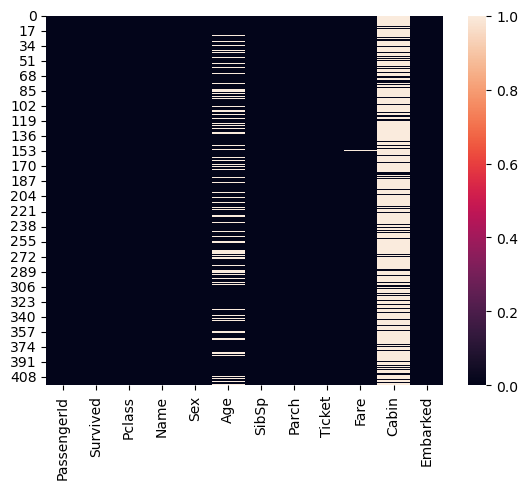

In [10]:
sns.heatmap(inp0.isnull())

In [21]:
inp0["Age"].replace(np.nan ,inp0["Age"].mean(), inplace=True)
inp0["Fare"].replace(np.nan, inp0["Fare"].mean() ,inplace=True)
inp0.drop('Cabin' ,axis = 1 ,inplace=True)

In [22]:
inp0.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

here we have to impute missing values of age and Fare with mean but for Cabin there are so much missing values so we can drop Cabin column

In [23]:
inp0.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [24]:
inp0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [40]:
# so here we can divide into two categories
cat_variable = [ "Pclass" ,"Sex" , "SibSp" , "Embarked" ]
num_variable = [ "Age" , "Fare" ]

In [27]:
round(inp0["Survived"].value_counts(normalize=True)*100 ,2)

Survived
0    63.64
1    36.36
Name: proportion, dtype: float64

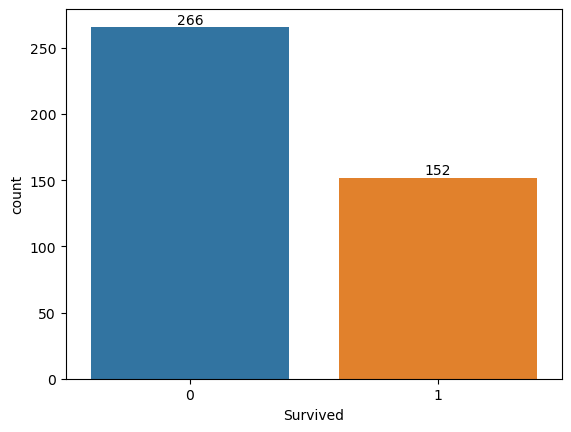

In [30]:
gr =sns.countplot(data= inp0 , x="Survived")
gr.bar_label(gr.containers[0])
plt.show()

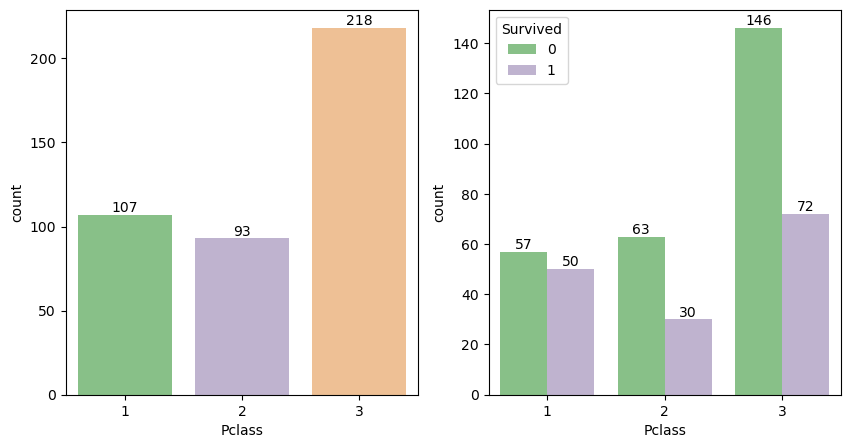

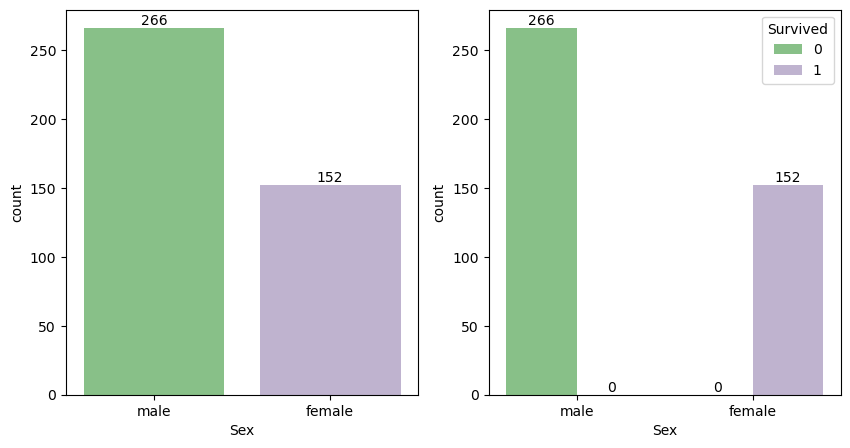

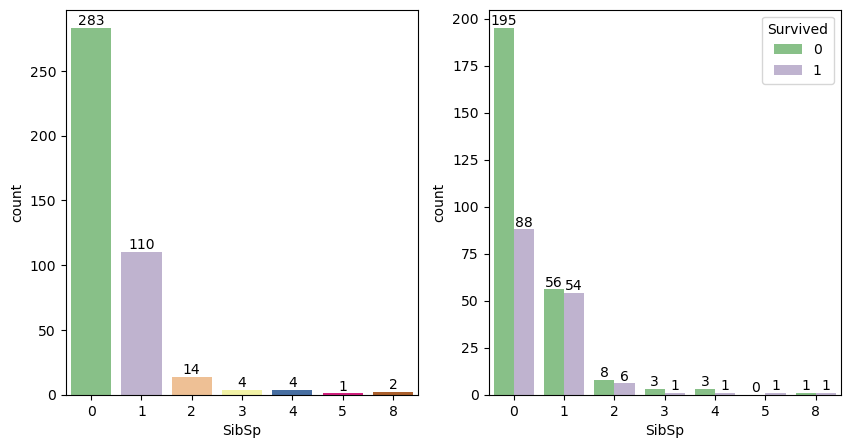

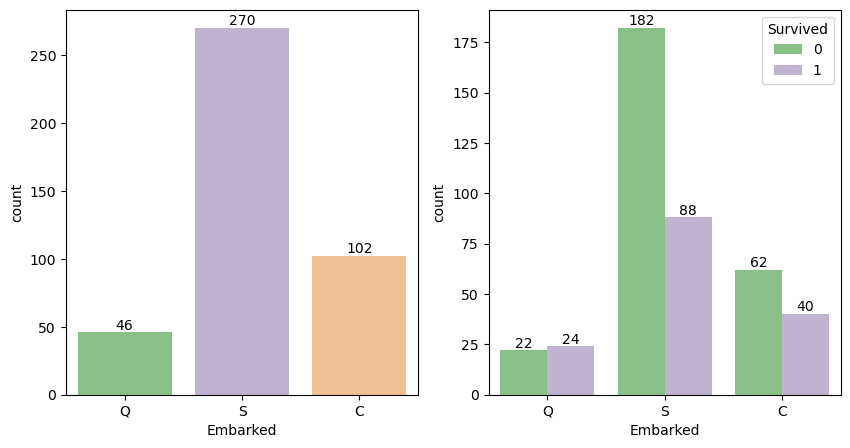

In [34]:
for column in cat_variable:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    gr =sns.countplot(data=inp0 , x= column, palette='Accent')
    gr.bar_label(gr.containers[0])
    
    
    plt.subplot(1,2,2)
    gr = sns.countplot( x =column ,data= inp0 ,hue='Survived' ,palette='Accent')
    gr.bar_label(gr.containers[0])
    gr.bar_label(gr.containers[1])
    plt.show()

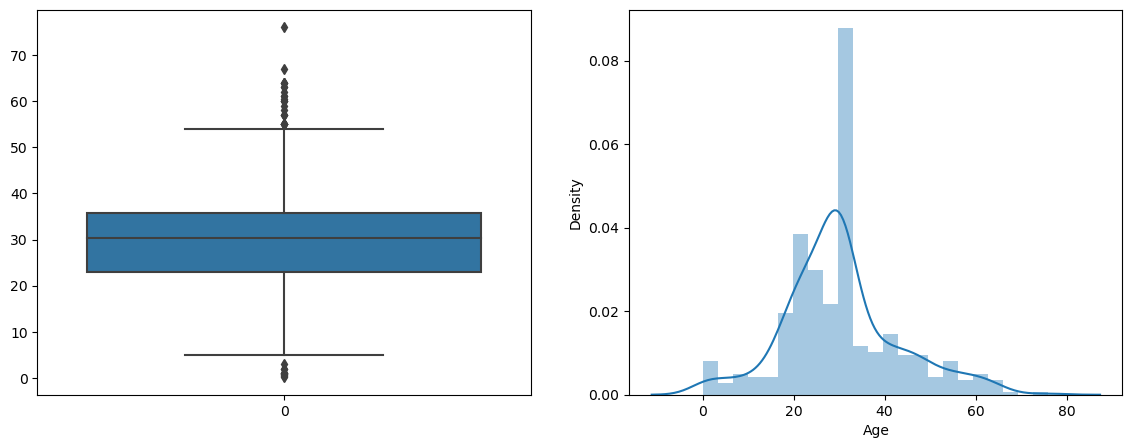

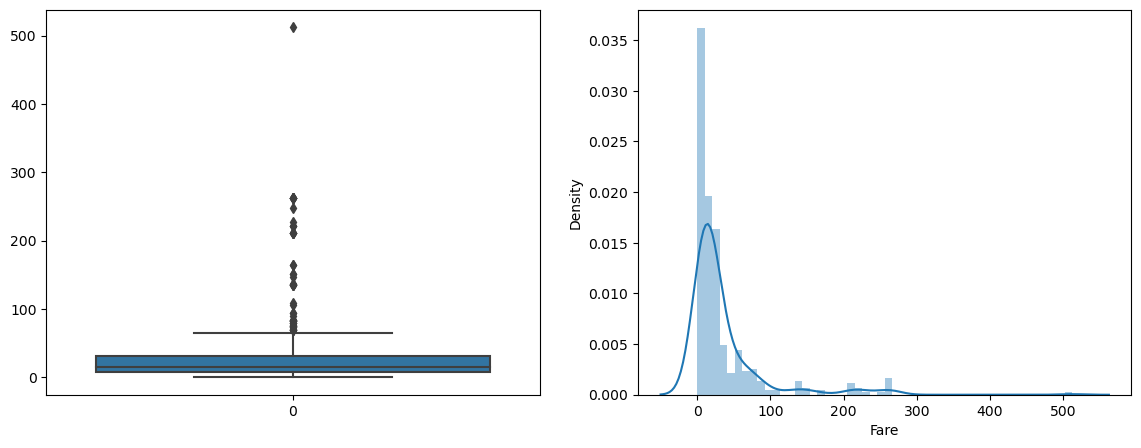

In [42]:
for column  in num_variable:
        plt.figure(figsize=(14,5))
        plt.subplot(1,2,1)
        gr = sns.boxplot(inp0[column])
        
        plt.subplot(1,2,2)
        gr = sns.distplot(inp0[column])
        plt.show()

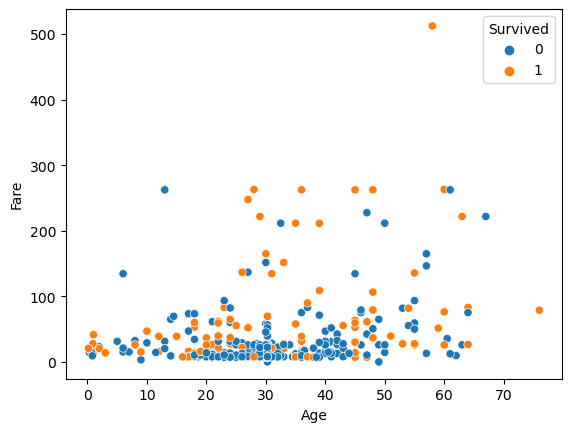

In [43]:
sns.scatterplot(data= inp0 , x='Age', y ='Fare', hue='Survived')
plt.show()

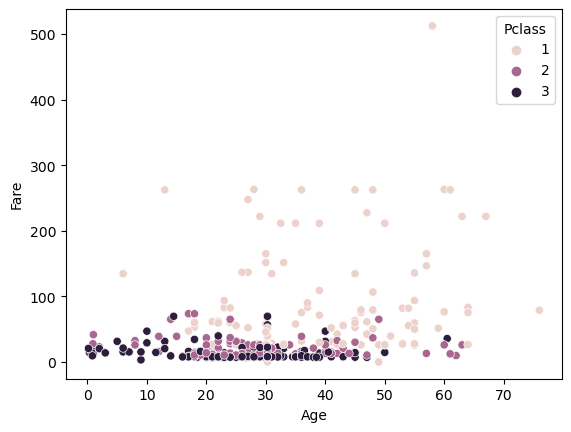

In [45]:
sns.scatterplot(data= inp0 , x='Age', y ='Fare', hue='Pclass')
plt.show()

In [48]:
inp1 = inp0.drop(["PassengerId" ,"Name","Ticket"],axis=1)


In [49]:
inp1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [50]:
inp1["Sex"].replace({'male':1 ,'female':0} ,inplace=True)
inp1["Embarked"].replace({'Q' :0,'S':1,'C':2},inplace=True)

In [51]:
inp1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


<Axes: >

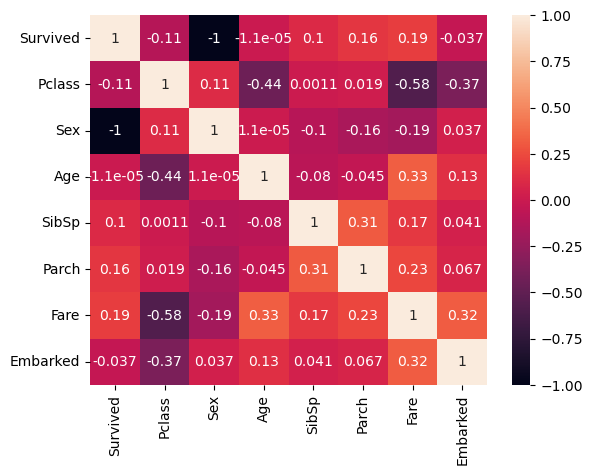

In [53]:
sns.heatmap(inp1.corr(), annot= True)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score ,confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay

In [59]:
X = inp1.drop("Survived" , axis=1)
y = inp1["Survived"]

In [60]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [61]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [62]:
X_train ,X_test , y_train ,y_test  = train_test_split(X,y ,test_size=0.2 ,random_state=42)

In [63]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train ,y_train)

LogisticRegression(random_state=42)

In [64]:
lr.coef_

array([[-1.74111050e-02, -6.13297087e+00,  1.66164537e-04,
         6.07203772e-02, -1.04714647e-02,  4.61886411e-03,
        -2.33454378e-01]])

In [65]:
lr.intercept_

array([2.84085683])

In [66]:
y_pred_lr =lr.predict(X_test)

In [67]:
lr.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [69]:
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('Precision: ', precision_score(y_test, y_pred_lr))
print('Recall: ', recall_score(y_test, y_pred_lr))
print('F1 Score: ', f1_score(y_test, y_pred_lr))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


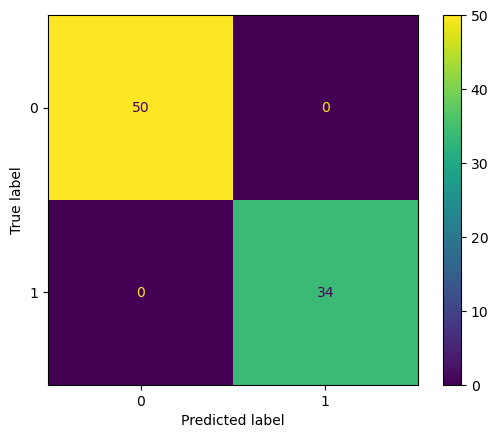

In [72]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot();

In [73]:
from sklearn.tree import  DecisionTreeClassifier

In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [77]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))
print('Precision: ', precision_score(y_test, y_pred_tree))
print('Recall: ', recall_score(y_test, y_pred_tree))
print('F1 Score: ', f1_score(y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


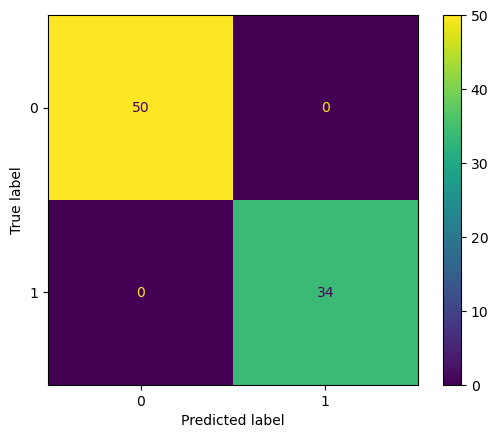

In [78]:
cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();